In [3]:
from numpy import array
import matplotlib
ket0 = array([1,0])
ket1 = array([0,1])

# perform operations on the kets
display(ket0/2 + ket1/2)

array([0.5, 0.5])

In [4]:
# create unitary operators using these arrays
M1 = array([[1,1],[0,0]])
M2 = array([[1,1],[1,0]])

M1/2+M2/2


array([[1. , 1. ],
       [0.5, 0. ]])

In [5]:
# perform manual operations
from numpy import matmul
display(matmul(M1,ket1))
display(matmul(M1,M2))

array([1, 0])

array([[2, 1],
       [0, 0]])

In [6]:
# we now create vectors using qiskit
from qiskit.quantum_info import Statevector
from numpy import sqrt
u = Statevector([1/sqrt(2),1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3,2/3])

display(u.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [7]:
# check to show every vector is valid
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [8]:
v = Statevector([(1+2.j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [9]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 560, '1': 440}

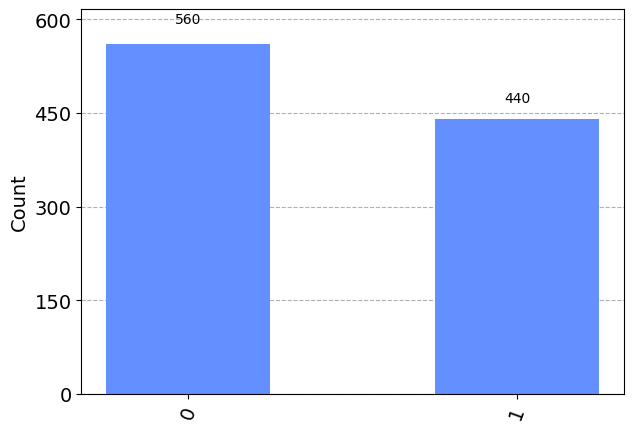

In [10]:
# visualize repeated measurements
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [11]:
from qiskit.quantum_info import Operator

X = Operator([[0,1],[1,0]])
Y = Operator([[0,-1.j],[1.j,0]])
Z = Operator([[1,0],[0,-1]])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [16]:
# we create our first quantum circuit!
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1) # one qubit

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [17]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

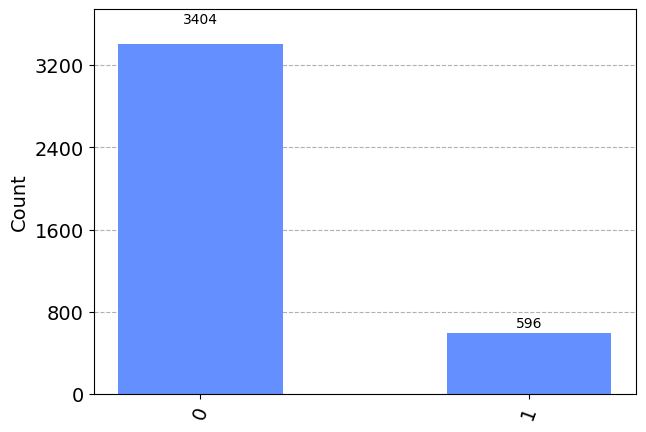

In [18]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)